In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
import io


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download and extract the dataset
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Load the CSV file
bank_data = pd.read_csv(z.open('bank-additional/bank-additional-full.csv'), sep=';')


In [4]:
# Encode categorical variables
le = LabelEncoder()
bank_data['job'] = le.fit_transform(bank_data['job'])
bank_data['marital'] = le.fit_transform(bank_data['marital'])
bank_data['education'] = le.fit_transform(bank_data['education'])
bank_data['default'] = le.fit_transform(bank_data['default'])
bank_data['housing'] = le.fit_transform(bank_data['housing'])
bank_data['loan'] = le.fit_transform(bank_data['loan'])
bank_data['contact'] = le.fit_transform(bank_data['contact'])
bank_data['month'] = le.fit_transform(bank_data['month'])
bank_data['day_of_week'] = le.fit_transform(bank_data['day_of_week'])
bank_data['poutcome'] = le.fit_transform(bank_data['poutcome'])
bank_data['y'] = le.fit_transform(bank_data['y'])

# Separate features and target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Build the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8894149065307113
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
[[6846  457]
 [ 454  481]]


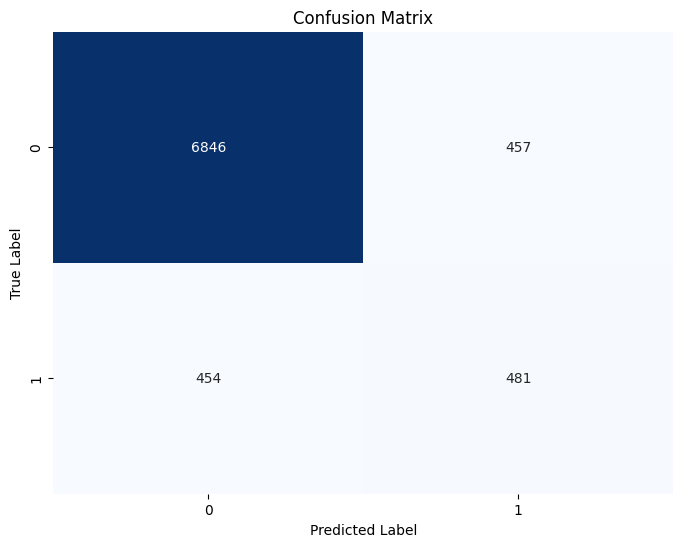

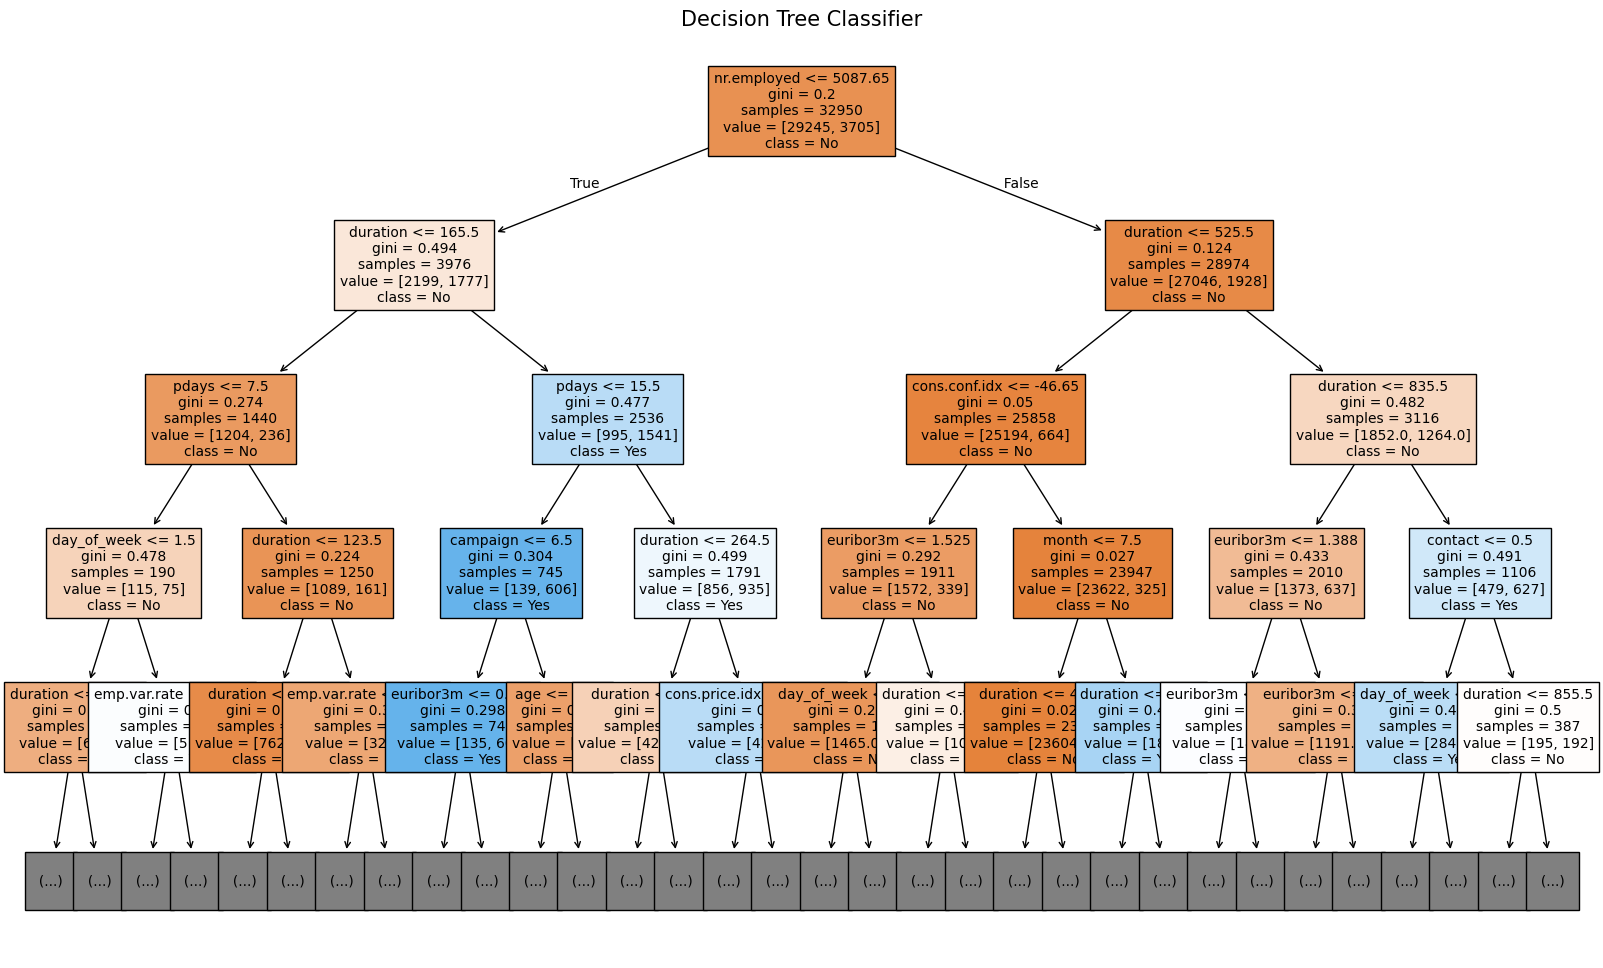

In [8]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualizing the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10, max_depth=3)
plt.title("Decision Tree Classifier", fontsize=15)
plt.show()
